In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('/Users/tisitao/Downloads/CUMCM2020Probelms/C/附件1：123家有信贷记录企业的相关数据.xlsx',
sheet_name='进项发票信息')

In [4]:
company_info=pd.read_excel('/Users/tisitao/Downloads/CUMCM2020Probelms/C/附件1：123家有信贷记录企业的相关数据.xlsx',
sheet_name='企业信息')

sale_info=pd.read_excel('/Users/tisitao/Downloads/CUMCM2020Probelms/C/附件1：123家有信贷记录企业的相关数据.xlsx',
sheet_name='销项发票信息')

In [5]:
df.head()

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票


In [4]:
company_info.head()

,企业代号,企业名称,信誉评级,是否违约
0,E1,***电器销售有限公司,A,否
1,E2,***技术有限责任公司,A,否
2,E3,***电子(中国)有限公司***分公司,C,否
3,E4,***发展有限责任公司,C,否
4,E5,***供应链管理有限公司,B,否


In [5]:
sale_info.head()

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票


In [8]:
df=df[df['发票状态']=='有效发票']

In [10]:
df['quater']=df['开票日期'].dt.to_period('Q')

In [124]:
df['进项负发票个数']=df['价税合计'].apply(lambda x:1 if x<0 else 0)

In [125]:
df

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,quater,进项负发票个数
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票,2017Q3,1
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票,2017Q3,1
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票,2017Q3,0
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票,2017Q3,0
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票,2017Q3,0
...,...,...,...,...,...,...,...,...,...,...
210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票,2019Q2,0
210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票,2020Q1,0
210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票,2017Q4,0
210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票,2018Q4,0


In [133]:
df_quater=df.groupby(['企业代号','quater']).aggregate({
    '价税合计':'sum',
    '发票号码':'count',
    '进项负发票个数':'sum'
})

In [134]:
df_quater=df_quater.reset_index(level=[0,1])

In [135]:
df_quater.rename(columns={'价税合计':'进项合计','发票号码':'订单个数'},inplace=True)

In [136]:
df1=df.copy()

In [137]:
df1_quater=df1.drop_duplicates(subset=['企业代号','销方单位代号','quater'])
xiao_num=df1_quater.groupby(['企业代号','quater'])['销方单位代号'].count().values.tolist()

In [138]:
df_quater['供货商个数']=xiao_num

In [139]:
df_quater

,企业代号,quater,进项合计,订单个数,进项负发票个数,供货商个数
0,E1,2017Q3,5.756247e+08,158,14,51
1,E1,2017Q4,6.953608e+08,233,15,80
2,E1,2018Q1,6.126124e+08,215,9,63
3,E1,2018Q2,9.729339e+08,360,1,79
4,E1,2018Q3,5.680497e+08,386,5,109
...,...,...,...,...,...,...
1305,E99,2018Q4,2.779955e+06,164,0,16
1306,E99,2019Q1,1.678337e+05,119,0,19
1307,E99,2019Q2,8.384794e+05,190,8,21
1308,E99,2019Q3,1.736557e+05,129,0,7


In [19]:
sale_info=sale_info[sale_info['发票状态']=='有效发票']

In [20]:
sale_info['quater']=sale_info['开票日期'].dt.to_period('Q')

In [140]:
sale_info

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,quater
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票,2017Q3
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,2017Q3
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,2017Q3
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,2017Q3
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,2017Q3
...,...,...,...,...,...,...,...,...,...
162479,E123,8887701,2019-12-17,B10944,4827.67,144.83,4972.5,有效发票,2019Q4
162480,E123,8887702,2019-12-17,B10944,7412.62,222.38,7635.0,有效发票,2019Q4
162481,E123,34173085,2019-12-17,B13093,1917.47,57.53,1975.0,有效发票,2019Q4
162482,E123,8887703,2019-12-25,B13093,7252.42,217.58,7470.0,有效发票,2019Q4


In [147]:
sale_info['销项负发票个数']=sale_info['价税合计'].apply(lambda x:1 if x<0 else 0 )

In [148]:
sale_quater=sale_info.groupby(['企业代号','quater']).aggregate({
    '价税合计':'sum',
    '发票号码':'count',
    '销项负发票个数':'sum'
})

In [149]:
sale_info1=sale_info.copy()
sale_info1_quater=sale_info1.drop_duplicates(subset=['企业代号','购方单位代号','quater'])
sale_num=sale_info1_quater.groupby(['企业代号','quater'])['购方单位代号'].count().values.tolist()

In [150]:
sale_quater['客户个数']=sale_num

In [151]:
sale_quater=sale_quater.reset_index(level=[0,1])
sale_quater.rename(columns={'价税合计':'销项合计','发票号码':'销项订单个数'},inplace=True)

In [152]:
sale_quater

,企业代号,quater,销项合计,销项订单个数,销项负发票个数,客户个数
0,E1,2017Q3,4.664307e+08,626,27,122
1,E1,2017Q4,4.899739e+08,784,19,154
2,E1,2018Q1,4.874645e+08,707,25,127
3,E1,2018Q2,5.562644e+08,841,22,149
4,E1,2018Q3,5.090587e+08,751,5,139
...,...,...,...,...,...,...
1328,E98,2020Q1,3.380000e+04,2,0,1
1329,E99,2018Q2,2.292035e+05,1,0,1
1330,E99,2018Q3,4.361974e+05,1,0,1
1331,E99,2019Q1,2.368449e+05,2,0,1


In [153]:
gc=pd.merge(df_quater,sale_quater,on=['企业代号','quater'],how='inner')

In [154]:
gc['净营业收入']=gc['销项合计']-gc['进项合计']

In [155]:
gc=pd.merge(gc,company_info,on='企业代号')

### 企业问题

<AxesSubplot:xlabel='信誉评级'>

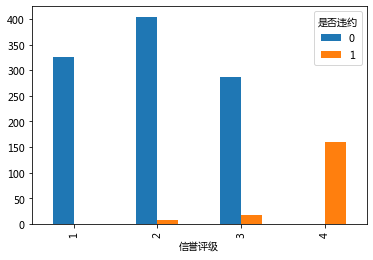

In [115]:
gc_count=gc.groupby(by=['信誉评级','是否违约']).count()
gc_count=gc_count.reset_index(level=[0,1])
gc_pivot=gc_count.pivot_table(index='信誉评级',
                    columns='是否违约',
                    values='企业代号')
gc_pivot.plot(kind='bar')

### 训练决策树模型

In [177]:
gc.shape
gc.to_csv('基础变量.csv',index=False)

In [52]:
set(gc['信誉评级'].values)

{'A', 'B', 'C', 'D'}

In [157]:
def convert(x):
    if x=='A':
        return 1
    elif x=='B':
        return 2
    elif x=='C':
        return 3
    else:
        return 4

In [158]:
gc['信誉评级']=gc['信誉评级'].apply(convert)

In [159]:
def convert_to_2(x):
    if x=='是':
        return 1
    else:
        return 0

In [160]:
gc['是否违约']=gc['是否违约'].apply(convert_to_2)

In [161]:
gc.head()

,企业代号,quater,进项合计,订单个数,进项负发票个数,供货商个数,销项合计,销项订单个数,销项负发票个数,客户个数,净营业收入,企业名称,信誉评级,是否违约
0,E1,2017Q3,5.756247e+08,158,14,51,4.664307e+08,626,27,122,-1.091939e+08,***电器销售有限公司,1,0
1,E1,2017Q4,6.953608e+08,233,15,80,4.899739e+08,784,19,154,-2.053868e+08,***电器销售有限公司,1,0
2,E1,2018Q1,6.126124e+08,215,9,63,4.874645e+08,707,25,127,-1.251479e+08,***电器销售有限公司,1,0
3,E1,2018Q2,9.729339e+08,360,1,79,5.562644e+08,841,22,149,-4.166695e+08,***电器销售有限公司,1,0
4,E1,2018Q3,5.680497e+08,386,5,109,5.090587e+08,751,5,139,-5.899094e+07,***电器销售有限公司,1,0


In [162]:
x=gc.drop(['企业代号','quater','企业名称','是否违约','信誉评级'],axis=1)
y=gc['信誉评级'].copy()

from sklearn import tree

dtree=tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=100,min_samples_split=300)
dtree=dtree.fit(x,y)

### 输出决策树图像，并作出决策 

In [65]:
import pydotplus
from IPython.display import Image
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
import os

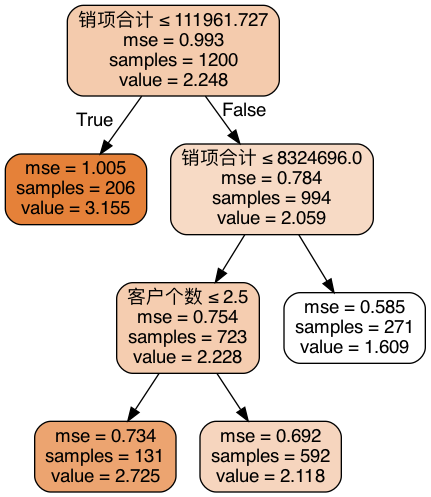

In [163]:
with open('dt.dot','w') as f:
    tree.export_graphviz(dtree,out_file=f)
dot_data=StringIO()
tree.export_graphviz(dtree,out_file=dot_data,
                    feature_names=x.columns,
                    class_names=['违约率'],
                    filled=True,rounded=True,
                    special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [179]:
gc.groupby('信誉评级').count()

,企业代号,quater,进项合计,订单个数,进项负发票个数,供货商个数,销项合计,销项订单个数,销项负发票个数,客户个数,净营业收入,企业名称,是否违约
信誉评级,,,,,,,,,,,,,
1,325,325,325,325,325,325,325,325,325,325,325,325,325
2,412,412,412,412,412,412,412,412,412,412,412,412,412
3,304,304,304,304,304,304,304,304,304,304,304,304,304
4,159,159,159,159,159,159,159,159,159,159,159,159,159


In [182]:
#决策树判断的A评级的企业
gc[gc['销项合计']>8324696]['企业代号'].unique()

array(['E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17',
       'E18', 'E19', 'E2', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25',
       'E28', 'E29', 'E3', 'E30', 'E32', 'E33', 'E34', 'E38', 'E4', 'E48',
       'E5', 'E57', 'E6', 'E63', 'E7', 'E8', 'E9'], dtype=object)

In [183]:
len(gc[gc['销项合计']>8324696]['企业代号'].unique())

35

信誉评级
A    27
B    38
C    34
D    24
Name: 企业代号, dtype: int64

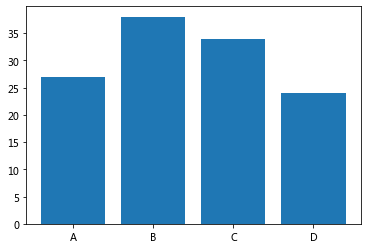

In [188]:
#企业评级分布
company_count=company_info.groupby(['信誉评级'])['企业代号'].count()
plt.bar(company_count.index,company_count.values)
company_count

([<matplotlib.patches.Wedge at 0x7fe5bbfaad90>,
 [Text(-0.8486380338760866, 0.6998667640765136, '否'),
  Text(0.8486379683498276, -0.6998668435317372, '是')],
 [Text(-0.4628934730233199, 0.3817455076780983, '78.0%'),
  Text(0.46289343728172405, -0.38174555101731117, '22.0%')])

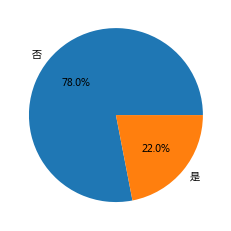

In [102]:
#企业违约分布

#设置中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

company_bad_count=company_info.groupby(['是否违约'])['企业代号'].count().to_frame()
company_bad_count['rate']=company_bad_count/company_bad_count.sum()
plt.pie(company_bad_count['rate'],labels=company_bad_count.index,autopct='%1.1f%%')

In [103]:
x=gc.drop(['企业代号','quater','企业名称','信誉评级'],axis=1)
y=gc['信誉评级'].copy()

from sklearn import tree

dtree=tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=100,min_samples_split=300)
dtree=dtree.fit(x,y)

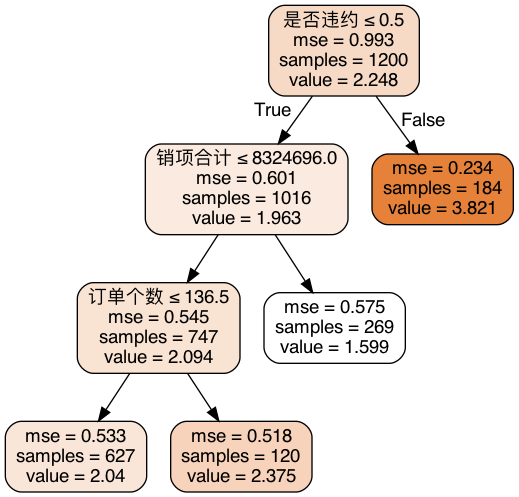

In [104]:
with open('dt.dot','w') as f:
    tree.export_graphviz(dtree,out_file=f)
dot_data=StringIO()
tree.export_graphviz(dtree,out_file=dot_data,
                    feature_names=x.columns,
                    class_names=['违约率'],
                    filled=True,rounded=True,
                    special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 数据规范化
- 采用StandardScaler方法对数据进行规范化,均值为0，方差为1的正态分布
- 采用PCA方法对数据进行降维

In [122]:
from sklearn.model_selection import learning_curve,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# pipeline=Pipeline([
#     ('scaler',StandardScaler()),
# #     ('pca',PCA()),
#     ('randomforestclassifier',RandomForestClassifier())
# ])

In [164]:
#30%作为测试集，其余作为训练集
train_x,test_x,train_y,test_y=train_test_split(x.values,y.values,test_size=0.30,stratify=y.values,random_state=1)


In [171]:
# 构造各种分类器
classifiers=[
    SVC(random_state=1,kernel='rbf'),
    DecisionTreeClassifier(random_state=1,criterion='gini'),
    RandomForestClassifier(random_state=1,criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
]

In [166]:
#分类器名称
classifier_names=[
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
]

In [173]:
#分类器参数
classifier_param_grid=[
    {'svc__C':[1],'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth':[3,4,6]},
    {'randomforestclassifier__n_estimators':[3,5,6]},
    {'kneighborsclassifier__n_neighbors':[4,6,8]}
]

In [169]:
#对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,param_grid,score='accuracy'):
    response={}
    gridsearch=GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring=score)
    #寻找最优的参数和最优的准确率分数
    search=gridsearch.fit(train_x,train_y)
    print('GridSearch最优参数：',search.best_params_)
    print('GridSearch最优分数:%0.4lf' %search.best_score_)
    predict_y=gridsearch.predict(test_x)
    print('准确率 %0.4lf' %accuracy_score(test_y,predict_y))
    response['predict_y']=predict_y
    response['accuracy_score']=accuracy_score(test_y,predict_y)
    return response



In [174]:
for model,model_name,model_param_grid in zip(classifiers,classifier_names,classifier_param_grid):
    pipeline=Pipeline([
        ('scaler',StandardScaler()),
        (model_name,model)
    ])
    result=GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,model_param_grid,score='accuracy')
    

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数:0.4238
准确率 0.4389
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数:0.4881
准确率 0.5556
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数:0.5643
准确率 0.5944
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 4}
GridSearch最优分数:0.5131
准确率 0.5222
